In [24]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp, quad
from scipy.spatial.transform import Rotation
import matplotlib.pyplot as plt

In [261]:
!g++ -o main main.cpp Integrator.cpp RCS.cpp -I ./ && ./main
df = pd.read_csv('data.csv')
df = df.set_index(keys='time', drop=True)

In [218]:
J = 20
J3 = J * 0.05
n = 15
lam = n*(J - J3)/J
mu = 0.1875
M1 = J * mu

Ap = mu*J/(lam*n*J3)
An = mu/(lam*n)
omega_p = J3*n/J
omega_n = n

w1_0 = 0
w2_0 = 0

t = df.index.values
theta_1 = -Ap*(1-np.cos(omega_p*t)) + An*(1-np.cos(omega_n*t))
theta_2 = Ap*np.sin(omega_p*t) - An*np.sin(omega_n*t)

w_1 = w1_0*np.cos(lam*t) + w2_0*np.sin(lam*t) + mu/lam*np.sin(lam*t)
w_2 = w2_0*np.cos(lam*t) - w1_0*np.sin(lam*t) - mu/lam*(1 - np.cos(lam*t))

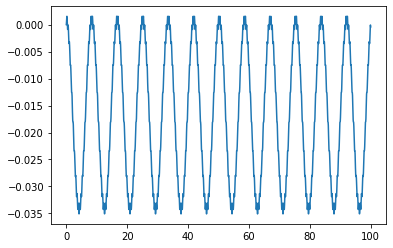

In [219]:
plt.plot(t, theta_1)

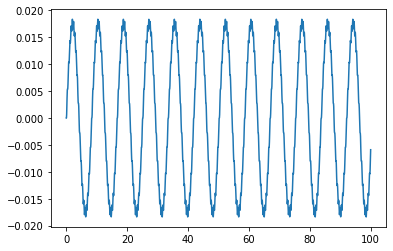

In [220]:
plt.plot(t, theta_2)

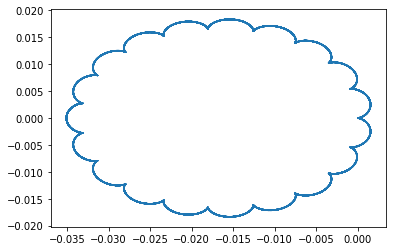

In [221]:
plt.plot(theta_1, theta_2)

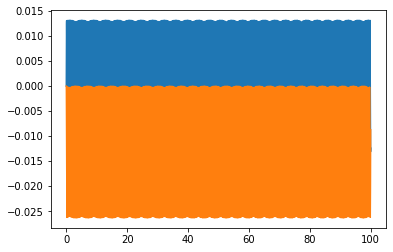

In [231]:
plt.plot(t, w_1, t, w_2)

In [242]:
q1 = df.quaternion_1.values
q2 = df.quaternion_2.values
q3 = df.quaternion_3.values
q4 = df.quaternion_4.values

C = np.array([[1 - 2*(q2 **2 + q3 **2), 2*(q1*q2 + q3*q4), 2*(q1*q3 - q2*q4)],
              [2*(q1*q2 - q3*q4), 1 - 2*(q1 **2 + q3 **2), 2*(q2*q3 + q1*q4)], 
              [2*(q1*q3 + q2*q4), 2*(q2*q3 - q1*q4), 1 - 2*(q1 ** 2 + q2 ** 2)]])
C = np.array([[df.dcm_1, df.dcm_2, df.dcm_3],
              [df.dcm_4, df.dcm_5, df.dcm_6],
              [df.dcm_7, df.dcm_8, df.dcm_9]])
C = np.swapaxes(C, 0, 2)

In [243]:
eulers = Rotation.from_matrix(C).as_euler('XYZ')

theta1_sim = np.arctan2(-C[:, 2, 1], C[:, 2, 2])
theta2_sim = np.arcsin(C[:, 2, 0])
theta3_sim = np.arctan2(-C[:, 1, 0], C[:, 0, 0])
# theta1_sim = eulers[:, 0]
# theta2_sim = eulers[:, 1]
# theta3_sim = eulers[:, 2]

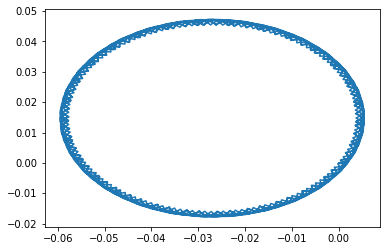

In [252]:
plt.plot(theta1_sim, theta2_sim)

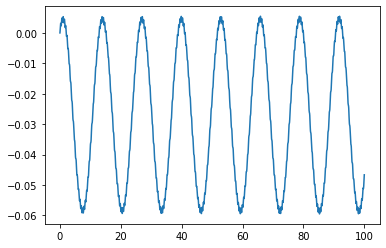

In [253]:
plt.plot(df.index.values, theta1_sim)

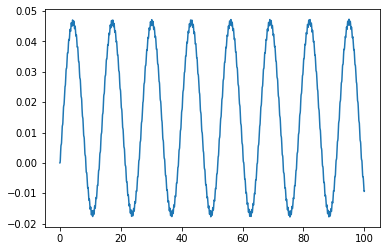

In [246]:
plt.plot(df.index.values, theta2_sim)

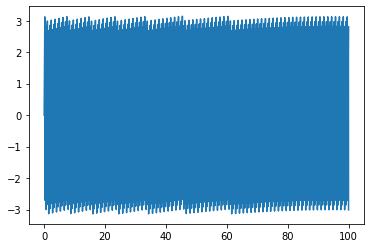

In [247]:
plt.plot(df.index.values, theta3_sim)

<AxesSubplot:xlabel='theta_1'>

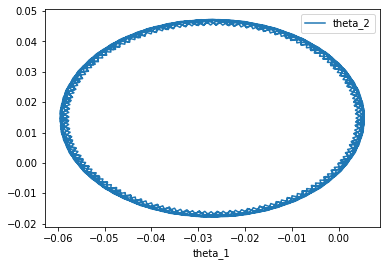

In [258]:
df.plot(x='theta_1', y='theta_2')

<AxesSubplot:xlabel='time'>

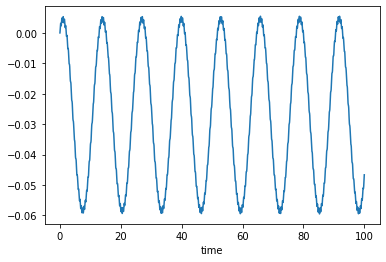

In [259]:
df.theta_1.plot()

<AxesSubplot:xlabel='time'>

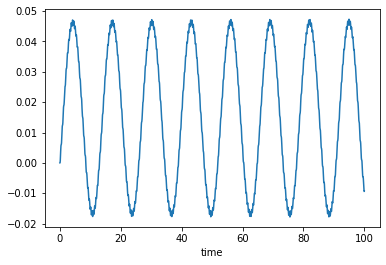

In [260]:
df.theta_2.plot()

<AxesSubplot:xlabel='time'>

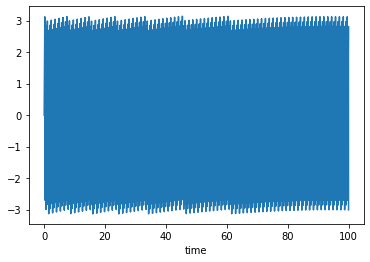

In [229]:
df.theta_3.plot()

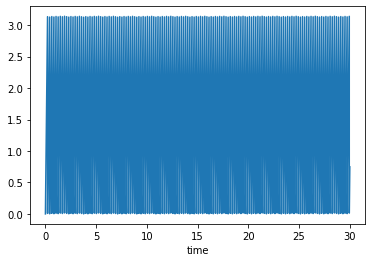

In [184]:
ax = df.roll.plot()

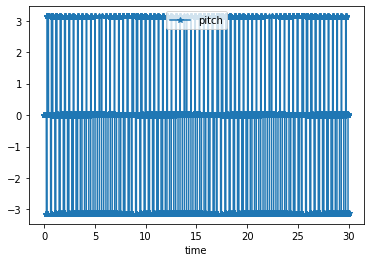

In [185]:
ax = df.plot(y='pitch', marker='*')

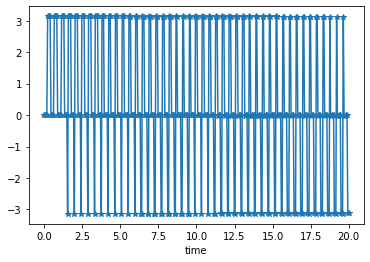

In [79]:
ax = df.yaw.plot(marker='*')

<AxesSubplot:xlabel='time'>

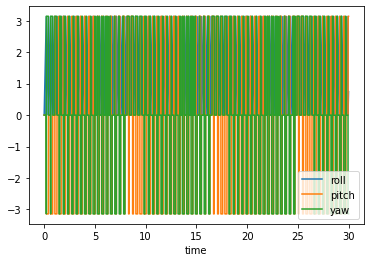

In [161]:
df[['roll', 'pitch', 'yaw']].plot()

<AxesSubplot:xlabel='time'>

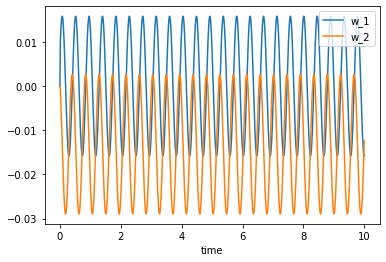

In [197]:
df[['w_1', 'w_2']].plot()

<AxesSubplot:xlabel='time'>

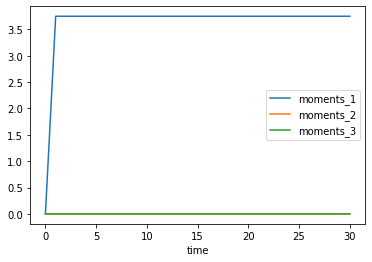

In [159]:
df[['moments_1', 'moments_2', 'moments_3']].plot()

<AxesSubplot:xlabel='time'>

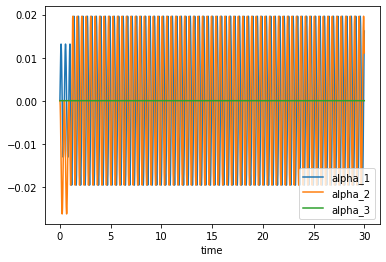

In [162]:
df[['alpha_1', 'alpha_2', 'alpha_3']].plot()